In [44]:
import pandas as pd  # pandas libray 
import seaborn as sns 
import matplotlib.pyplot as plt

In [34]:
data=pd.read_csv(r'/Users/pravinshinde/Downloads/User_Data.csv')
print(data.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [20]:
data.shape # what are the rows and columns

(400, 5)

In [30]:
data.isnull().sum() # show all missing values

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [32]:
data.isnull().sum().sum()

0

In [42]:
data.notnull().sum().sum()

2000

In [26]:
data.isnull().sum()/data.shape[0]*100  # calculate in  percentage format all rows missing value

User ID            0.0
Gender             0.0
Age                0.0
EstimatedSalary    0.0
Purchased          0.0
dtype: float64

In [36]:
data.isnull().sum()/(data.shape[0]*data.shape[1])*100  # calculate in  percentage format all missing value for overall dataset 

User ID            0.0
Gender             0.0
Age                0.0
EstimatedSalary    0.0
Purchased          0.0
dtype: float64

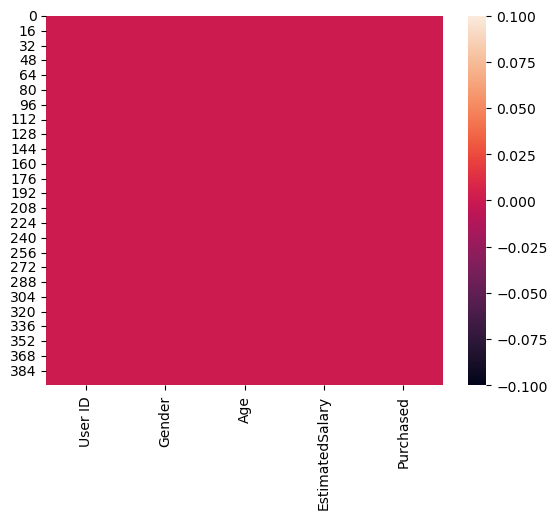

In [58]:
sns.heatmap(data.isnull())
plt.show()

In [ ]:
# handaling the missing values

In [64]:
data.drop(columns = ['Age'],inplace=True) # drop the column

In [68]:
data.isnull().sum()

User ID            0
Gender             0
EstimatedSalary    0
Purchased          0
dtype: int64

In [70]:
data.dropna(inplace=True)# delete all missing values 

In [72]:
data.isnull().sum()

User ID            0
Gender             0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
# fill the missing data


In [74]:
data.fillna(10)# fill the missing missig data to 10

,User ID,Gender,EstimatedSalary,Purchased
0,15624510,Male,19000,0
1,15810944,Male,20000,0
2,15668575,Female,43000,0
3,15603246,Female,57000,0
4,15804002,Male,76000,0
...,...,...,...,...
395,15691863,Female,41000,1
396,15706071,Male,23000,1
397,15654296,Female,20000,1
398,15755018,Male,33000,0


In [76]:
data.isnull().sum()


User ID            0
Gender             0
EstimatedSalary    0
Purchased          0
dtype: int64

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [90]:
for i in data.select_dtypes(include='object').columns:
    data[i].fillna(data[i].mode()[0], inplace=True)   #using the mode it can fill all  the mssing values  in the dataset


/var/folders/w6/w0lg558j7n909bd5_jy8hqqw0000gn/T/ipykernel_1644/879312733.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[i].fillna(data[i].mode()[0], inplace=True)


In [98]:
# HANDALING THE MISSING VALUES USING SCIKIT-LEARN 

In [102]:
data.select_dtypes(include='float64').columns

Index([], dtype='object')

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [92]:
from sklearn.impute import SimpleImputer

In [110]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Select only numeric columns for imputation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Initialize the SimpleImputer with 'mean' strategy
si = SimpleImputer(strategy='mean')

# Apply the imputer to numeric columns
arr = si.fit_transform(numeric_data)

# Convert the result back to a DataFrame
imputed_data = pd.DataFrame(arr, columns=numeric_data.columns)

print(imputed_data.head())


      User ID  EstimatedSalary  Purchased
0  15624510.0          19000.0        0.0
1  15810944.0          20000.0        0.0
2  15668575.0          43000.0        0.0
3  15603246.0          57000.0        0.0
4  15804002.0          76000.0        0.0


In [ ]:
# one hot encoding # covert catogorial data to numerical format data

In [5]:
import pandas as pd
data=pd.read_csv(r'/Users/pravinshinde/Downloads/User_Data.csv')
print(data.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [15]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [21]:
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)

In [ ]:
# there are two methods to perform this operations 
# usind pandas libraray to call get_dummies()
#sklearn using one hot encoder class 

In [96]:
en_data=data[['Gender']]
en_data

,Gender
0,Male
1,Male
2,Female
3,Female
4,Male
...,...
395,Female
396,Male
397,Female
398,Male


In [98]:
# Convert categorical variable(s) into dummy/indicator variables
pd.get_dummies(en_data).info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Gender_Female  400 non-null    bool 
 1   Gender_Male    400 non-null    bool 
dtypes: bool(2)
memory usage: 932.0 bytes


# Assistant
The selected code `pd.get_dummies()` is a function from the Pandas library that is used to convert categorical variable(s) into dummy/indicator variables. Here's a step-by-step explanation:

1. **Function Purpose**: `pd.get_dummies()` is primarily used for one-hot encoding, which transforms categorical data into a format that can be provided to machine learning algorithms to improve predictions.

2. **Input**: The function can take a DataFrame or a Series as input, where it identifies categorical columns and creates new binary columns for each category.

3. **Output**: The output is a new DataFrame where each categorical value is represented as a separate column with binary values (0 or 1). For example, if a column has three categories (A, B, C), it will create three new columns: `A`, `B`, and `C`, with 1s and 0s indicating the presence of each category.

4. **Usage**: This function is commonly used in data preprocessing steps before feeding data into machine learning models, as many algorithms require numerical input.

Overall, `pd.get_dummies()` is a powerful tool for handling categorical data in data analysis and machine learning workflows.

In [102]:
from sklearn.preprocessing import OneHotEncoder

In [104]:
ohe = OneHotEncoder(drop='first')
ar=ohe.fit_transform(en_data).toarray() 
print(ar)# convert data into array

[[1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.

In [ ]:
pd.DataFrame(ar,columns =['Gender_Female',' Gender_Male '])

In [ ]:
# LABEL ENCODING

In [131]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Create a DataFrame
df = pd.DataFrame({'name': ['cow', 'buff', 'cat', 'dog']})

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the 'name' column
df['en_name'] = le.fit_transform(df["name"])

print(df)


   name  en_name
0   cow        2
1  buff        0
2   cat        1
3   dog        3


In [135]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
data=pd.read_csv(r'/Users/pravinshinde/Downloads/User_Data.csv')
print(data.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [145]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
data=pd.read_csv(r'/Users/pravinshinde/Downloads/User_Data.csv')
print(data.head())

le=LabelEncoder()
le.fit(data['EstimatedSalary'])

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


LabelEncoder()

In [161]:
le.transform(data[['EstimatedSalary']])

KeyError: "None of [Index(['EstimatedSalary'], dtype='object')] are in the [columns]"

In [147]:
data['EstimatedSalary']=le.transform(data['EstimatedSalary'])
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,4,0
1,15810944,Male,35,5,0
2,15668575,Female,26,26,0
3,15603246,Female,27,39,0
4,15804002,Male,19,57,0
...,...,...,...,...,...
395,15691863,Female,46,24,1
396,15706071,Male,51,8,1
397,15654296,Female,50,5,1
398,15755018,Male,36,17,0


In [ ]:
# ORDINAL ENCODING

In [155]:
import pandas as pd
data = pd.DataFrame({'size':['x','xl','m','ml']})
data

,size
0,x
1,xl
2,m
3,ml


In [159]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
oe.fit(data[['size']])

OrdinalEncoder()

In [163]:
data['size_e']=oe.transform(data[['size']])
data

,size,size_e
0,x,2.0
1,xl,3.0
2,m,0.0
3,ml,1.0


In [165]:
import pandas as pd

# Create a DataFrame with an ordinal feature
df = pd.DataFrame({'size': ['small', 'medium', 'large', 'medium', 'small']})

# Define the ordinal mapping
size_mapping = {'small': 1, 'medium': 2, 'large': 3}

# Use the map() function to encode the ordinal data
df['size_encoded'] = df['size'].map(size_mapping)

# Display the DataFrame
print(df)


     size  size_encoded
0   small             1
1  medium             2
2   large             3
3  medium             2
4   small             1


In [ ]:
#outliers

In [185]:
import pandas as pd
import seaborn as sns
data=pd.read_csv(r'/Users/pravinshinde/Downloads/User_Data.csv')
print(data.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [187]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


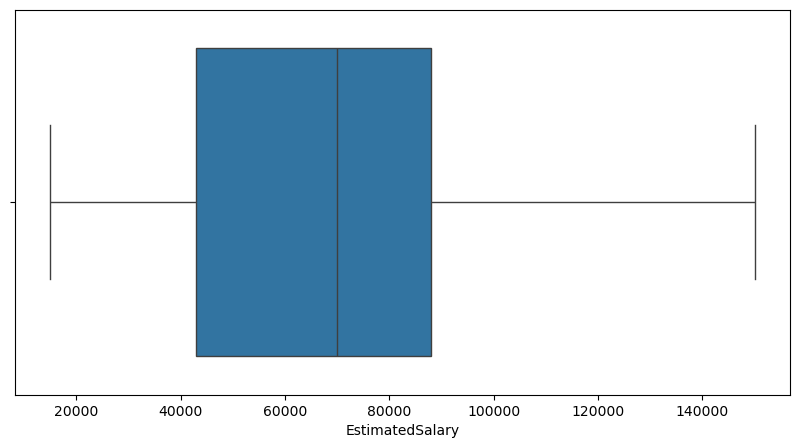

In [220]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Load the dataset
data = pd.read_csv(r'/Users/pravinshinde/Downloads/User_Data.csv')

# Display the first few rows of the data
print(data.head())
plt.figure(figsize=(10,5))
# Create a boxplot of the 'EstimatedSalary' column
sns.boxplot(x='EstimatedSalary', data=data)

# Show the plot
plt.show()

In [230]:
data.shape

(400, 5)

In [224]:
q1=data['EstimatedSalary'].quantile(0.25)
q3=data['EstimatedSalary'].quantile(0.75)
iqr=q3-q1
iqr

45000.0

In [226]:
min_range=q1-(1.5*iqr)
max_range=q1+(1.5*iqr)
min_range,max_range

(-24500.0, 110500.0)

In [228]:
new_dataset = data[data['EstimatedSalary']<=max_range]
new_dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


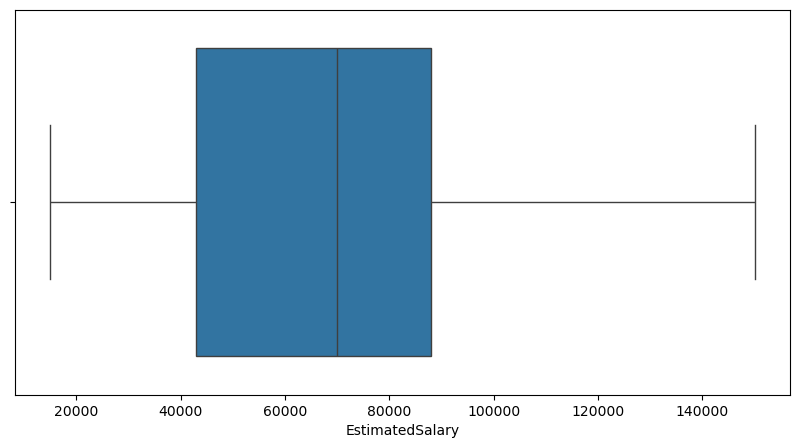

In [210]:
plt.figure(figsize=(10,5))
# Create a boxplot of the 'EstimatedSalary' column
sns.boxplot(x='EstimatedSalary', data=data)
# Show the plot
plt.show()

/var/folders/w6/w0lg558j7n909bd5_jy8hqqw0000gn/T/ipykernel_1432/196180506.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['EstimatedSalary'])


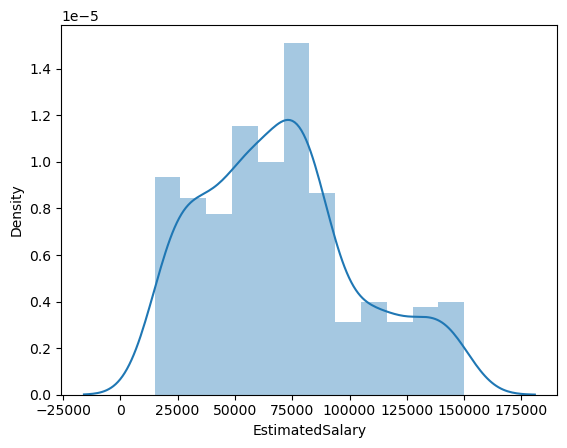

In [236]:
sns.distplot(data['EstimatedSalary'])
# Show the plot
plt.show()

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


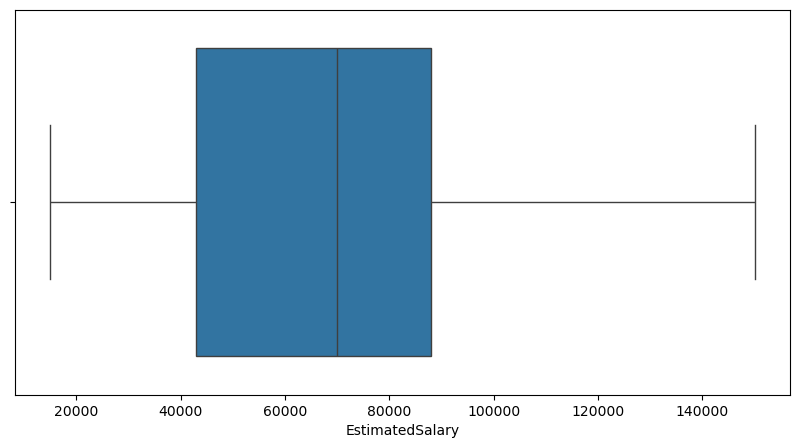

      User ID  Gender  Age  EstimatedSalary  Purchased   z_score
0    15624510    Male   19            19000          0 -1.488183
1    15810944    Male   35            20000          0 -1.458854
2    15668575  Female   26            43000          0 -0.784307
3    15603246  Female   27            57000          0 -0.373714
4    15804002    Male   19            76000          0  0.183521
..        ...     ...  ...              ...        ...       ...
395  15691863  Female   46            41000          1 -0.842964
396  15706071    Male   51            23000          1 -1.370870
397  15654296  Female   50            20000          1 -1.458854
398  15755018    Male   36            33000          0 -1.077589
399  15594041  Female   49            36000          1 -0.989604

[400 rows x 6 columns]


In [244]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Load the dataset
data = pd.read_csv(r'/Users/pravinshinde/Downloads/User_Data.csv')

# Display the first few rows of the data
print(data.head())

# Plotting the boxplot for 'EstimatedSalary'
plt.figure(figsize=(10, 5))  # Set figure size
sns.boxplot(x='EstimatedSalary', data=data)  # Create the boxplot
plt.show()  # Show the plot

# Calculate z-scores for the 'EstimatedSalary' column
data['z_score'] = (data['EstimatedSalary'] - data['EstimatedSalary'].mean()) / data['EstimatedSalary'].std()

# Filter the data where 'z_score' is less than 3 (within 3 standard deviations)
filtered_data = data[data['z_score'] < 3]

# Display the filtered DataFrame
print(filtered_data)


In [ ]:
#scaling standardization ,normalization ,
#reduced the magnitude only by using scaler method

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Load the dataset
data = pd.read_csv(r'/Users/pravinshinde/Downloads/User_Data.csv')

# Display the first few rows of the data
print(data.head())

In [246]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
z_score            0
dtype: int64

In [248]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

/var/folders/w6/w0lg558j7n909bd5_jy8hqqw0000gn/T/ipykernel_1432/1761542025.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(),inplace=True)


/var/folders/w6/w0lg558j7n909bd5_jy8hqqw0000gn/T/ipykernel_1432/2317092479.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

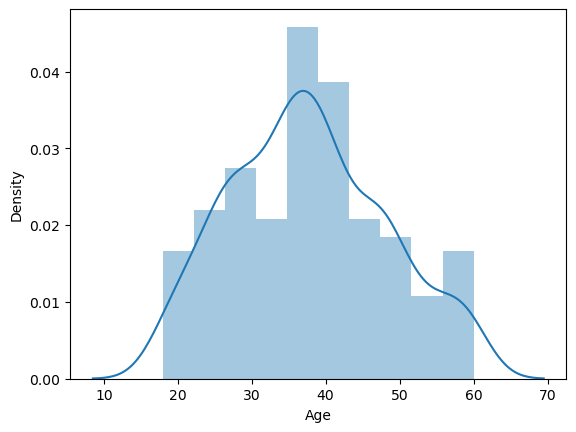

In [250]:
sns.distplot(data['Age'])

In [254]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased,z_score
count,4.000000e+02,400.000000,400.000000,400.000000,4.000000e+02
mean,1.569154e+07,37.655000,69742.500000,0.357500,3.552714e-17
std,7.165832e+04,10.482877,34096.960282,0.479864,1.000000e+00
min,1.556669e+07,18.000000,15000.000000,0.000000,-1.605495e+00
25%,1.562676e+07,29.750000,43000.000000,0.000000,-7.843075e-01
50%,1.569434e+07,37.000000,70000.000000,0.000000,7.551993e-03
75%,1.575036e+07,46.000000,88000.000000,1.000000,5.354583e-01
max,1.581524e+07,60.000000,150000.000000,1.000000,2.353802e+00


In [285]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the dataset
data = pd.read_csv(r'/Users/pravinshinde/Documents/data.csv')
data

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [295]:

# Initialize the StandardScaler
ss = StandardScaler()

# Fit the scaler on the 'Age' column (reshaped to 2D)
ss.fit(data[['Discount Amount']])

# Transform the 'Age' column and print the standardized values
data['Discount Amount_ss'] =pd.DataFrame( ss.transform(data[['Discount Amount']]),columns=['x'])
print(data)


           Date       Day  SKU City  Volume         BU  Brand       Model  \
0    01-04-2021  Thursday  M01    C      15    Mobiles  RealU       RU-10   
1    01-04-2021  Thursday  M02    C      10    Mobiles  RealU   RU-9 Plus   
2    01-04-2021  Thursday  M03    C       7    Mobiles   YouM       YM-99   
3    01-04-2021  Thursday  M04    C       6    Mobiles   YouM  YM-99 Plus   
4    01-04-2021  Thursday  M05    C       3    Mobiles   YouM      YM-98    
..          ...       ...  ...  ...     ...        ...    ...         ...   
445  15-04-2021  Thursday  L06    C       2  Lifestyle  Jeera   M-Casuals   
446  15-04-2021  Thursday  L07    C       6  Lifestyle   Viva   W-Western   
447  15-04-2021  Thursday  L08    C       2  Lifestyle   Viva    W-Lounge   
448  15-04-2021  Thursday  L09    C       3  Lifestyle  Jeera   M-Formals   
449  15-04-2021  Thursday  L10    C       1  Lifestyle  Jeera     M-Shoes   

     Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0 

/var/folders/w6/w0lg558j7n909bd5_jy8hqqw0000gn/T/ipykernel_1432/3926069616.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Discount Amount_ss'])


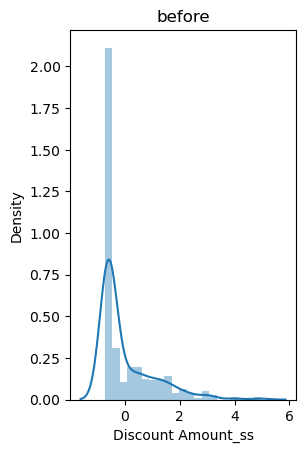

/var/folders/w6/w0lg558j7n909bd5_jy8hqqw0000gn/T/ipykernel_1432/3926069616.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Discount Amount'])


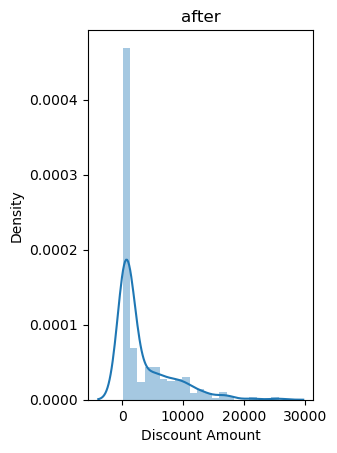

In [299]:
plt.subplot(1,2,1)
plt.title('before')
sns.distplot(data['Discount Amount_ss'])
plt.show()

plt.subplot(1,2,1)
plt.title('after')
sns.distplot(data['Discount Amount'])
plt.show()

In [ ]:
Mathematical Formula for Standardization: Z=X−μ/σ
​	
 
Where:

Z is the standardized value

X is the original value

μ is the mean of the feature

σ is the standard deviation of the feature

#min_max scalling


In [301]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Load the dataset
data = pd.read_csv(r'/Users/pravinshinde/Documents/data.csv')
data

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [303]:

# Initialize the StandardScaler
ss = MinMaxScaler()

# Fit the scaler on the 'Age' column (reshaped to 2D)
ss.fit(data[['Discount Amount']])

# Transform the 'Age' column and print the standardized values
data['Discount Amount_ss'] =pd.DataFrame( ss.transform(data[['Discount Amount']]),columns=['x'])
print(data)


           Date       Day  SKU City  Volume         BU  Brand       Model  \
0    01-04-2021  Thursday  M01    C      15    Mobiles  RealU       RU-10   
1    01-04-2021  Thursday  M02    C      10    Mobiles  RealU   RU-9 Plus   
2    01-04-2021  Thursday  M03    C       7    Mobiles   YouM       YM-99   
3    01-04-2021  Thursday  M04    C       6    Mobiles   YouM  YM-99 Plus   
4    01-04-2021  Thursday  M05    C       3    Mobiles   YouM      YM-98    
..          ...       ...  ...  ...     ...        ...    ...         ...   
445  15-04-2021  Thursday  L06    C       2  Lifestyle  Jeera   M-Casuals   
446  15-04-2021  Thursday  L07    C       6  Lifestyle   Viva   W-Western   
447  15-04-2021  Thursday  L08    C       2  Lifestyle   Viva    W-Lounge   
448  15-04-2021  Thursday  L09    C       3  Lifestyle  Jeera   M-Formals   
449  15-04-2021  Thursday  L10    C       1  Lifestyle  Jeera     M-Shoes   

     Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0 

/var/folders/w6/w0lg558j7n909bd5_jy8hqqw0000gn/T/ipykernel_1432/1697964486.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Discount Amount'])


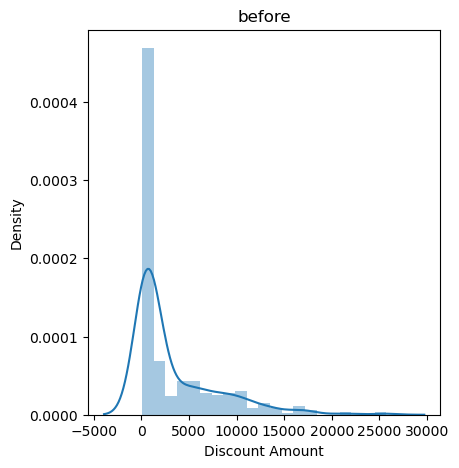

/var/folders/w6/w0lg558j7n909bd5_jy8hqqw0000gn/T/ipykernel_1432/1697964486.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Discount Amount_ss'])


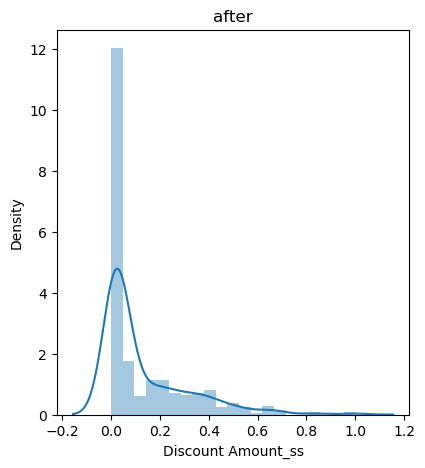

In [311]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('before')
sns.distplot(data['Discount Amount'])
plt.show()

plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
plt.title('after')
sns.distplot(data['Discount Amount_ss'])
plt.show()

In [315]:
# duplicates values remove

import pandas as pd

# Sample data
data = pd.DataFrame({'Age': [25, 32, 47, 51, 62], 
                     'Salary': [50000, 54000, 61000, 58000, 62]})ata

data

,Age,Salary
0,25,50000
1,32,54000
2,47,61000
3,51,58000
4,62,62


In [327]:
data['duplicated']=data.duplicated()
data

,Age,Salary,duplicated
0,25,50000,False
1,32,54000,False
2,47,61000,False
3,51,58000,False
4,62,62,False


In [329]:
data.drop_duplicates()

,Age,Salary,duplicated
0,25,50000,False
1,32,54000,False
2,47,61000,False
3,51,58000,False
4,62,62,False


In [ ]:
replace and change the value

In [331]:
import pandas as pd

# Load the dataset
data = pd.read_csv(r'/Users/pravinshinde/Documents/data.csv')
data

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [335]:
data['Avg Price'].value_counts()

Avg Price
450      30
8100     30
1300     30
400      30
500      30
12100    15
1900     15
1600     15
2600     15
2099     15
900      15
1099     15
560      15
465      15
290      15
10100    15
390      15
300      15
60100    15
55100    15
54100    15
49100    15
20100    15
16100    15
3100     15
Name: count, dtype: int64

In [339]:
data['Avg Price'].isnull().sum().sum()
data

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [343]:
data['Avg Price'].replace('3100','3000',inplace=True)
data

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [6]:
import pandas as pd

# Sample DataFrame
data = pd.DataFrame({'Category': ['A', 'B', 'C', 'A', 'B'],
                     'Value': [10, 20, 30, 40, 50]})

# Replace 'A' with 'X' in the 'Category' column
data['Category'] = data['Category'].replace('A', 'X')

print(data)

  Category  Value
0        X     10
1        B     20
2        C     30
3        X     40
4        B     50


In [ ]:
#function TRransformation


#convert the non-normal distribution data to nornal distribution

In [117]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Load the dataset
data = pd.read_csv(r'/Users/pravinshinde/Documents/data.csv')
data


,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [118]:
data.describe

<bound method NDFrame.describe of            Date       Day  SKU City  Volume         BU  Brand       Model  \
0    01-04-2021  Thursday  M01    C      15    Mobiles  RealU       RU-10   
1    01-04-2021  Thursday  M02    C      10    Mobiles  RealU   RU-9 Plus   
2    01-04-2021  Thursday  M03    C       7    Mobiles   YouM       YM-99   
3    01-04-2021  Thursday  M04    C       6    Mobiles   YouM  YM-99 Plus   
4    01-04-2021  Thursday  M05    C       3    Mobiles   YouM      YM-98    
..          ...       ...  ...  ...     ...        ...    ...         ...   
445  15-04-2021  Thursday  L06    C       2  Lifestyle  Jeera   M-Casuals   
446  15-04-2021  Thursday  L07    C       6  Lifestyle   Viva   W-Western   
447  15-04-2021  Thursday  L08    C       2  Lifestyle   Viva    W-Lounge   
448  15-04-2021  Thursday  L09    C       3  Lifestyle  Jeera   M-Formals   
449  15-04-2021  Thursday  L10    C       1  Lifestyle  Jeera     M-Shoes   

     Avg Price  Total Sales Value  Discou

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [123]:
data.isnull().sum()

Date                 0
Day                  0
SKU                  0
City                 0
Volume               0
BU                   0
Brand                0
Model                0
Avg Price            0
Total Sales Value    0
Discount Rate (%)    0
Discount Amount      0
Net Sales Value      0
dtype: int64

In [125]:
data

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


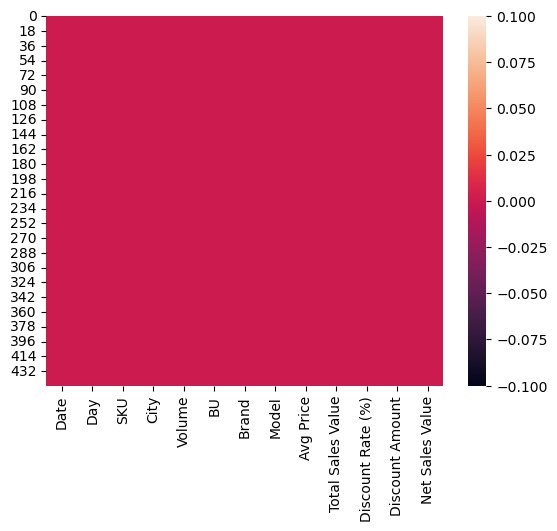

In [127]:
sns.heatmap(data.isnull())
plt.show()

In [129]:
q1=data['Discount Amount'].quantile(0.25)
q3=data['Discount Amount'].quantile(0.75)
iqr=q3-q1
iqr

4856.03612280112

In [131]:
min_r=q1-1.5*iqr
max_r=q3+1.5*iqr
min_r,max_r

(-6823.594880316146, 12600.54961088833)

In [133]:
'''data[data['Discount Amount']<=max_r]
data'''

"data[data['Discount Amount']<=max_r]\ndata"

/var/folders/w6/w0lg558j7n909bd5_jy8hqqw0000gn/T/ipykernel_1680/2736464905.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Discount Amount'])


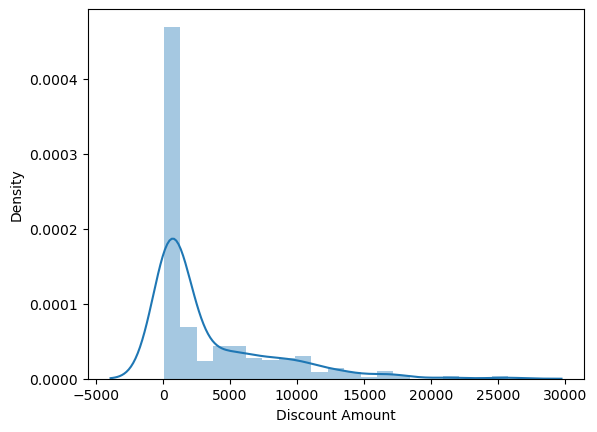

In [135]:
sns.distplot(data['Discount Amount'])
plt.show()

In [137]:
from sklearn.preprocessing import FunctionTransformer
ft=FunctionTransformer(func=np.log1p)

In [139]:
ft.fit(data['Discount Amount'])

FunctionTransformer(func=<ufunc 'log1p'>)

In [141]:
data['Discount Amount_ft']=ft.transform(data[['Discount Amount']])

/var/folders/w6/w0lg558j7n909bd5_jy8hqqw0000gn/T/ipykernel_1680/2684627743.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Discount Amount'])


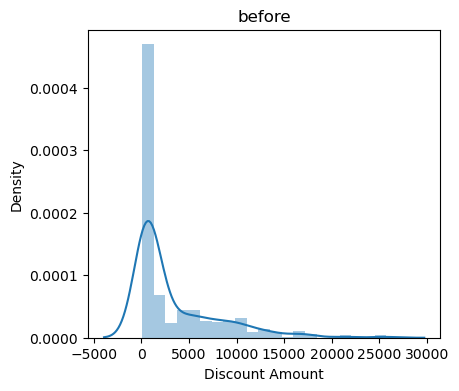

/var/folders/w6/w0lg558j7n909bd5_jy8hqqw0000gn/T/ipykernel_1680/2684627743.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Discount Amount_ft'])


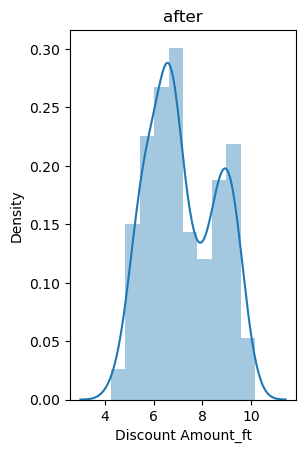

In [143]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title('before')
sns.distplot(data['Discount Amount'])
plt.show()


plt.subplot(1,2,2)
plt.title('after')
sns.distplot(data['Discount Amount_ft'])
plt.show()


In [ ]:
#feature selecetion technique


In [205]:
import pandas as pd
from mlxtend.feature_selection import SequentialFeatureSelector as SFS  # Corrected the spelling of 'Sequential'

In [207]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Load the dataset
data = pd.read_csv(r'/Users/pravinshinde/Documents/data.csv')
data.head(3)


,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843


In [255]:
x=data.iloc[:,:-1]
y=data['Day']

In [257]:
x.shape

(450, 12)

In [259]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
lr = LogisticRegression()

In [261]:
fs = SFS(lr,k_features=12,forward=True)
fs.fit(x,y)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py", line 1201, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py", line 1263, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py", line 997, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/_array_api.py", line 521, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: '01-04-2021'


In [239]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Load the dataset
data = pd.read_csv(r'/Users/pravinshinde/Documents/data.csv')

# Display the first 3 rows to verify the data
print(data.head(3))

# Define features (all columns except the last one) and target variable
X = data.iloc[:, :-1]  # All rows, all columns except the last
y = data['Net Sales Value']  # Target column

# Print the shape of the feature matrix
print(X.shape)

# Initialize the logistic regression model
lr = LogisticRegression(max_iter=200, solver='liblinear')

# Initialize Sequential Feature Selector (SFS) with logistic regression
fs = SFS(lr, 
          k_features=12, 
          forward=True, 
          floating=False, 
          scoring='accuracy', 
          cv=5)  # 5-fold cross-validation

# Fit the feature selector on the dataset
fs.fit(X, y)

# Print selected feature indices
print(f"Selected Feature Indices: {fs.k_feature_idx_}")

# Optional: Display the names of the selected features
selected_features = X.columns[list(fs.k_feature_idx_)]
print(f"Selected Features: {selected_features}")


         Date       Day  SKU City  Volume       BU  Brand      Model  \
0  01-04-2021  Thursday  M01    C      15  Mobiles  RealU      RU-10   
1  01-04-2021  Thursday  M02    C      10  Mobiles  RealU  RU-9 Plus   
2  01-04-2021  Thursday  M03    C       7  Mobiles   YouM      YM-99   

   Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      12100             181500          11.654820     21153.498820   
1      10100             101000          11.560498     11676.102961   
2      16100             112700           9.456886     10657.910157   

   Net Sales Value  
0    160346.501180  
1     89323.897039  
2    102042.089843  
(450, 12)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py", line 1201, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py", line 1263, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py", line 997, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/_array_api.py", line 521, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: '04-04-2021'

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py", line 1201, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py", line 1263, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py", line 997, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/_array_api.py", line 521, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: '01-04-2021'
